<a href="https://colab.research.google.com/github/santiagoruizs/IML_Proyecto_Final/blob/master/colabs/Ciclo_Combinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables

AT = Ambient Temperature

V = Exhaust Vacuum *(no ambiental)*

AP = Ambient Pressure

RH = Relative Humidity

**PE = Hourly Electrical Energy Output**

*N = Dataset tab (Day?)*

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Postgrau IML/6. Final Project/datasets/Combined Cycle Power Plant/CC.csv',header=0)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,AT,V,AP,RH,PE,N
0,14.96,41.76,1024.07,73.17,463.26,1
1,25.18,62.96,1020.04,59.08,444.37,1
2,5.11,39.40,1012.16,92.14,488.56,1
3,20.86,57.32,1010.24,76.64,446.48,1
4,10.82,37.50,1009.23,96.62,473.90,1


In [ ]:
df.describe()

,AT,V,AP,RH,PE,N
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009,3.000000
std,7.452162,12.707362,5.938535,14.599658,17.066281,1.414228
min,1.810000,25.360000,992.890000,25.560000,420.260000,1.000000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000,2.000000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000,3.000000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000,4.000000
max,37.110000,81.560000,1033.300000,100.160000,495.760000,5.000000


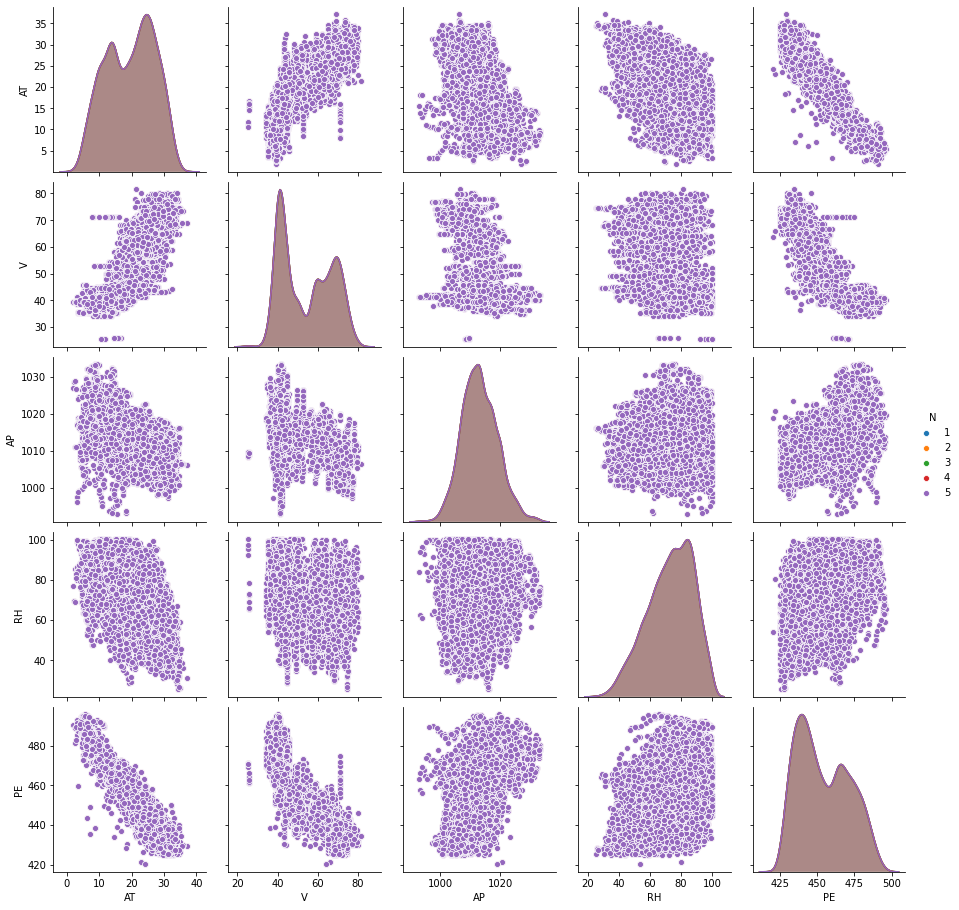

In [ ]:
sns.pairplot(df,hue='N')

Las diferentes tablas encontradas en el dataset son los propios datos originales ordenados de forma distinta y aleatoria, para que, en su momento, los algoritmos de ML utilizados no aprendieran según el orden de los datos (WEKA). Usaremos solo una de las tablas.

In [ ]:
df = df.loc[df['N']==1]
df.drop(columns=['N'],inplace=True)
df.columns

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


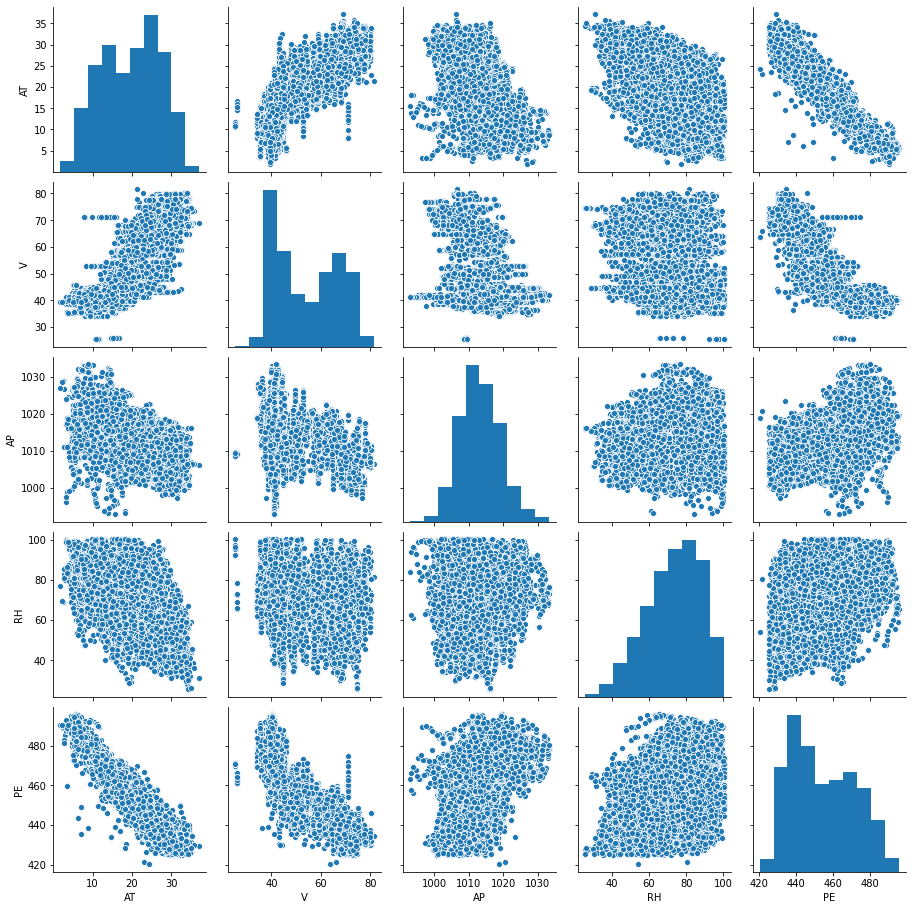

In [ ]:
sns.pairplot(df)

Al tratarse de una variable de salida numérica (no categórica), usaremos regresión lineal para describir el dataset.

# Machine Learning

### Con todas las variables

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

target = df['PE'].values
features = df[['AT','V','AP','RH']]
print(features.size)

#dfScaled = StandardScaler().fit_transform(df[features])

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
features_poly=poly.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

print(features_poly.size)
print(features.iloc[1])
print("")
print("[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]")
print(features_poly[[1]])

38272
95680
AT      25.18
V       62.96
AP    1020.04
RH      59.08
Name: 1, dtype: float64

[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]
[[2.51800000e+01 6.29600000e+01 1.02004000e+03 5.90800000e+01
  1.58533280e+03 2.56846072e+04 1.48763440e+03 6.42217184e+04
  3.71967680e+03 6.02639632e+04]]


In [ ]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
Coef1=np.array(clf.coef_)
Inter1=np.array(clf.intercept_)

print("El R2 es: {}".format(r2_score(y_test,y_pred)))
print("El pendiente es: {}".format(clf.coef_))
print("El intercept es: {}".format(clf.intercept_))

El R2 es: 0.9367184768437753
El pendiente es: [-3.61908892e+00 -7.87590483e+00 -1.41991794e-01  1.70735024e+00
  2.13116038e-02  1.00159784e-03 -5.02222008e-03  7.02236082e-03
  5.98182405e-04 -1.73807635e-03]
El intercept es: 675.0705409192207


### Sólo con variables ambientales (Sin "V")

In [ ]:
target = df['PE'].values
features = df[['AT','AP','RH']]
print(features.size)

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
features_poly=poly.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

print(features_poly.size)
print(features.iloc[1])
print("")
print("[AT, AP, RH; AT*AP, AT*RH, AP*RH]")
print(features_poly[[1]])

28704
57408
AT      25.18
AP    1020.04
RH      59.08
Name: 1, dtype: float64

[AT, AP, RH; AT*AP, AT*RH, AP*RH]
[[2.51800000e+01 1.02004000e+03 5.90800000e+01 2.56846072e+04
  1.48763440e+03 6.02639632e+04]]


In [ ]:
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
Coef2=np.array(clf.coef_)
Inter2=np.array(clf.intercept_)

print("El R2 es: {}".format(r2_score(y_test,y_pred)))
print("El pendiente es: {}".format(clf.coef_))
print("El intercept es: {}".format(clf.intercept_))

El R2 es: 0.9250249829794376
El pendiente es: [-1.34646492e+00  1.71772706e-01  1.79045757e+00 -2.45203896e-04
 -1.06157768e-02 -1.74364921e-03]
El intercept es: 324.60492108003496


In [ ]:
AT=20
V=54
AP=1013
RH=73

features = np.array([AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH])
features.dot(Coef1.T)+Inter1

452.1314536157411

In [ ]:
def get_AT():
  while True:
    num = float(input("Enter AT: "))
    if 0 <= num <= 40:
      return num
    else:
      print("Try again (0-40)")

def get_RH():
  while True:
    num = float(input("Enter RH: "))
    if 20 <= num <= 90:
      return num
    else:
      print("Try again (20-90)")

def get_AP():
  while True:
    num = float(input("Enter AP: "))
    if 950 <= num <= 1050:
      return num
    else:
      print("Try again (950-1050)")

def get_V():
  while True:
    num = input("Enter V (-): ")
    if num=="-":
      return "-"
    if 25 <= float(num) <= 100:
      return float(num)
    else:
      print("Try again (25-100) or '-'")

AT = get_AT()
AP = get_AP()
RH = get_RH()
V = get_V()

def result():
  print('EXPECTED Hourly Electrical Energy Output: ')
  if V=="-":
    features2 = np.array([AT,AP,RH,AT*AP,AT*RH,AP*RH])
    return round(features2.dot(Coef2.T)+Inter2,2)
  else:
    features1 = np.array([AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH])
    return round(features1.dot(Coef1.T)+Inter1,2)

result()

Enter AT: 20
Enter AP: 1000
Enter RH: 30
Enter V (-): 30
EXPECTED Hourly Electrical Energy Output: 


464.51

# Random Forest

In [ ]:
df_round=df.round(0)
df_round.head()

,AT,V,AP,RH,PE
0,15.0,42.0,1024.0,73.0,463.0
1,25.0,63.0,1020.0,59.0,444.0
2,5.0,39.0,1012.0,92.0,489.0
3,21.0,57.0,1010.0,77.0,446.0
4,11.0,38.0,1009.0,97.0,474.0


In [ ]:
target = df_round['PE'].values
features = df[['AT','V','AP','RH']]
print(features.size)

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_poly=poly.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

print(features_poly.size)
print(features.iloc[1])
print("")
print("[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]")
print(features_poly[[1]])

38272
133952
AT      25.18
V       62.96
AP    1020.04
RH      59.08
Name: 1, dtype: float64

[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]
[[2.51800000e+01 6.29600000e+01 1.02004000e+03 5.90800000e+01
  6.34032400e+02 1.58533280e+03 2.56846072e+04 1.48763440e+03
  3.96396160e+03 6.42217184e+04 3.71967680e+03 1.04048160e+06
  6.02639632e+04 3.49044640e+03]]


In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.metrics import r2_score

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

adaB = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=15), random_state=0, 
                         n_estimators=300, loss='exponential', learning_rate=0.05, )
adaB.fit(x_train, y_train)

test_prediction = adaB.predict(x_test)
test_acc = r2_score(y_test, test_prediction)

print("Test Accuracy score: {0}".format(test_acc))

Test Accuracy score: 0.965189662640451


In [ ]:
def get_AT():
  while True:
    num = float(input("Enter AT: "))
    if 0 <= num <= 40:
      return num
    else:
      print("Try again (0-40)")

def get_RH():
  while True:
    num = float(input("Enter RH: "))
    if 20 <= num <= 90:
      return num
    else:
      print("Try again (20-90)")

def get_AP():
  while True:
    num = float(input("Enter AP: "))
    if 950 <= num <= 1050:
      return num
    else:
      print("Try again (950-1050)")

def get_V():
  while True:
    num = input("Enter V: ")
    if num=="-":
      return "-"
    if 25 <= float(num) <= 100:
      return float(num)
    else:
      print("Try again (25-100) or '-'")

AT = get_AT()
AP = get_AP()
RH = get_RH()
V = get_V()

print("Expected Hourly Electrical Energy Output: {0}".format(adaB.predict(poly.fit_transform([[AT,V,AP,RH]]))[0]))

Enter AT: 20
Enter AP: 1000
Enter RH: 30
Enter V (-): 30
Expected Hourly Electrical Energy Output: 466.0


# AUTO ML

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.metrics import r2_score

In [ ]:
df_round=df.round(0)
df_round.head()

,AT,V,AP,RH,PE
0,15.0,42.0,1024.0,73.0,463.0
1,25.0,63.0,1020.0,59.0,444.0
2,5.0,39.0,1012.0,92.0,489.0
3,21.0,57.0,1010.0,77.0,446.0
4,11.0,38.0,1009.0,97.0,474.0


In [ ]:
target = df_round['PE'].values
features = df[['AT','V','AP','RH']]
print(features.size)

poly = PolynomialFeatures(interaction_only=False, include_bias=False)
features_poly=poly.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

print(features_poly.size)
print(features.iloc[1])
print("")
print("[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]")
print(features_poly[[1]])

38272
133952
AT      25.18
V       62.96
AP    1020.04
RH      59.08
Name: 1, dtype: float64

[AT, V, AP, RH; AT*V, AT*AP, AT*RH, V*AP, V*RH, AP*RH]
[[2.51800000e+01 6.29600000e+01 1.02004000e+03 5.90800000e+01
  6.34032400e+02 1.58533280e+03 2.56846072e+04 1.48763440e+03
  3.96396160e+03 6.42217184e+04 3.71967680e+03 1.04048160e+06
  6.02639632e+04 3.49044640e+03]]


In [ ]:
autoML = autosklearn.regression.AutoSklearnRegressor(
          time_left_for_this_task=5000, 
          per_run_time_limit=500,)
autoML.fit(x_train, y_train)

test_prediction = autoML.predict(x_test)
test_acc = r2_score(y_test, test_prediction)

print("Test Accuracy score: {0}".format(test_acc))
print(autoML.sprint_statistics())
print(autoML.show_models())

[WARNING] [2020-07-08 19:00:03,522:AutoMLSMBO(1)::81a7d88ec0fb82980eaa5dfacb236d3c] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
Test Accuracy score: 0.956392630928684
auto-sklearn results:
  Dataset name: 81a7d88ec0fb82980eaa5dfacb236d3c
  Metric: r2
  Best validation score: 0.946778
  Number of target algorithm runs: 47
  Number of successful target algorithm runs: 29
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 3

[(0.260000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'm